<a href="https://colab.research.google.com/github/jirvingphd/fsds_pt_100719_cohort_notes/blob/master/section_08_Multiple_Regression_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION 08 - Part 1: MULTIPLE REGRESSION

## LEARNING OBJECTIVES:
- Learn how to expand our last lesson to include multiple independent variables
- Learn how to check data for the assumptions of linear regression.
- Learn ways to deal with categorical variables.
- Learn about multicollinearity of features
- Learn about how to improve a baseline model based on results
- Learn how to run a multiple regression using statsmodels


# Questions from Students:
- How do we know when to use scaling / normalization?



### TOPICS:

### Part 1:
- Multiple Linear Regression
- Dealing with Categorical Variables
- Multicollinearity of Features

### Part 2
- Feature Scaling & Normalization
- Multiple Linear Regression in Statsmodels
- Model Fit and Validation


# PREVIOUSLY ON...

## Single Linear Regression

In [0]:
# !pip install -U fsds_100719
from IPython.display import clear_output
clear_output()
from fsds_100719.imports import *

fsds_1007219  v0.4.11 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 
> For convenient loading of standard modules use: `>> from fsds_100719.imports import *`



Package,Handle,Description
IPython.display,dp,Display modules with helpful display and clearing commands.
fsds_100719,fs,Custom data science bootcamp student package
matplotlib,mpl,Matplotlib's base OOP module with formatting artists
matplotlib.pyplot,plt,Matplotlib's matlab-like plotting module
numpy,np,scientific computing with Python
pandas,pd,High performance data structures and tools
seaborn,sns,High-level data visualization library based on matplotlib


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df_hw = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/dsc-complete-regression-lab-online-ds-ft-100719/master/heightWeight.csv')
display(df_hw.head(2))


,height,weight
0,68,165
1,71,201


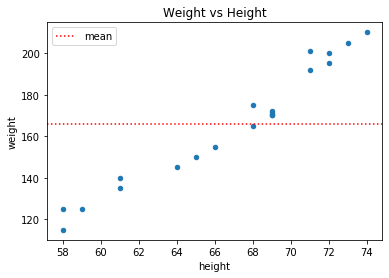

In [0]:

def scatter_mean(df_hw,x='height',y='weight',figsize=(6,4)):
    """Plot a scatter . plot"""
    ax = df_hw.plot(kind='scatter',x=x,y=y,figsize=figsize,title='Weight vs Height')
    ax.axhline(df_hw[y].mean(),color='red',label='mean',ls=':')
    ax.legend()
    fig = ax.get_figure()
    return fig,ax

fig, ax = scatter_mean(df_hw)

- We discussed how the mean is our worst model.

- We discussed the assumptions for a linear regression:
    - Linear relationship between predictor and target variable.
    - Predictor (x) and its error terms have a normal distribution
    - Homoskedasticity ( variance of residuals is constant)
    
- We learned how to run a single regession in statsmodels

In [0]:
# import statsmodels.api as sm
# import statsmodels.stats.api as sms
# import statsmodels.formula.api as smf
# import scipy.stats as stats

# formula = "weight~height"
# model = smf.ols(formula=formula, data=df_hw)

# results = model.fit()
# results.summary()

In [0]:
## Get x and y 
x = df_hw['height'].values
y = df_hw['weight'].values

## Define a fuction to get paramns from 
def get_eqn(results,x):
    """Creates equation from OLS results (grab slope (m) and y-intercept (c)),
    and calculates y_values for the line using x.
    Args:
        results (statsmodels RegressionResults): The output of `results = model.fit()`
        x (list/array): x values
    Returns:
        y_pred(array): the y values to plot for the regression equation
        eqn (str): string form of the equation"""
    params = results.params.round(3)
    c = params[0]
    m = params[1]
    eqn = f"y = {m} x +{c}"
    print(eqn)

    y_pred = [(xi*m)+c for xi in x]
    return y_pred,eqn


In [0]:
formula = "weight~height"
model = smf.ols(formula=formula, data=df_hw)
results = model.fit()
results.params

pandas.core.series.Series

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     384.8
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           1.35e-13
Time:                        22:14:27   Log-Likelihood:                -64.112
No. Observations:                  20   AIC:                             132.2
Df Residuals:                      18   BIC:                             134.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -204.4834     18.929    -10.802      0.000    -244.252    -164.714
height         5.5390      0.282     19.616      0.000       4.946       6.132
==============================================================================
Omnibus:                        2.588   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                1.245
Skew:                           0.202   Prob(JB):                        0.537
Kurtosis:                       1.846   Cond. No.                         902.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 5.539 x +-204.483


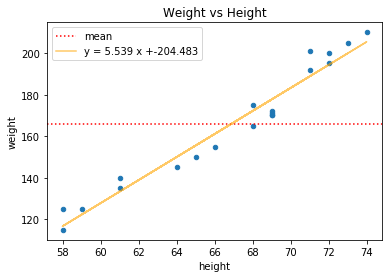

In [0]:
## PUTTING IT ALL TOGETHER.

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats


formula = "weight~height"
model = smf.ols(formula=formula, data=df_hw)

results = model.fit()
display(results.summary())

## Get y_pred and equation for plot
y_pred,eqn = get_eqn(results,x)
## Reproduce our scatter_mean plot
fig,ax = scatter_mean(df_hw)
ax.plot(x,y_pred,alpha=0.6,c='orange',label=eqn)
ax.legend();

# Multiple Linear Regression

## Single Regression
 $$y=mx+b$$

 $$y = \beta_1 x_1 + \beta_0 $$

<br><br>
## Multiple Predictor/X Variables

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots + \beta_n x_n $$

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-multiple-linear-regression-online-ds-ft-100719/master/images/multiple_reg.png" width=400>

#### $\hat Y$ vs $Y$


- Y: Actual value corresponding to a specific X value

- "Y hat" ($\hat Y$): Predicted value predicted fromn a specific X value.


$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$ 

where $n$ is the number of predictors, $\beta_0$ is the intercept, and $\hat y$ is the so-called "fitted line" or the predicted value associated with the dependent variable.

## DEALING WITH CATEGORICAL VARIABLES

- What are categorical variables?
- Understand creating dummy variables for predictors.
- Use pandas and Scikit-Learn to create dumies
- Understand and avoid the "dummy variable trap"

## What are categorical variables?
- Variables that do not represent a continuous number. 

## Identifying categorical variables:
What to look for?
1. Column dtype is 'object'
2. Use `df.describe()` -  check for min/max. Are they integers?
3. Use scatterplots & histograms -  look for columns of datapoints


In [0]:
df = fs.datasets.load_autompg()
display(df.head(3))
df.info()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null int64
car name        392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


**Matplotlib References**
- [Markers](https://matplotlib.org/3.1.1/api/markers_api.html)
- [Colors](https://matplotlib.org/3.1.0/gallery/color/named_colors.html )
- [Text](https://matplotlib.org/3.1.0/tutorials/text/text_intro.html )
- [Text Properties](https://matplotlib.org/3.1.1/tutorials/text/text_props.html)

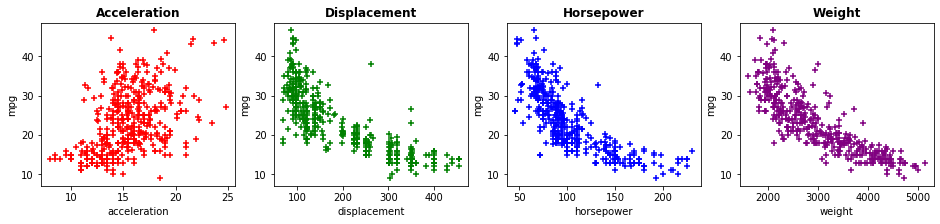

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cols_to_plot = ['acceleration','displacement','horsepower','weight']

colors = ['red','green','blue','purple']
fig, axes = plt.subplots(ncols=4, figsize=(16,3))

for i, col in enumerate(cols_to_plot):
    axes[i].scatter(x=df[col],y=df['mpg'],c=colors[i],marker='+')
    axes[i].set_title(col.title(),fontdict={"weight":'bold'})
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('mpg')

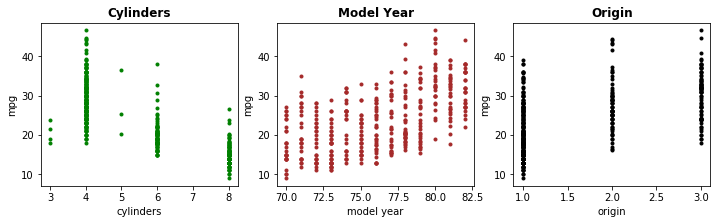

In [0]:
cols_to_plot = [ 'cylinders', 'model year', 'origin']
colors = ['green','brown','black']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))

for i, col in enumerate(cols_to_plot):
    axes[i].scatter(x=df[col],y=df['mpg'],marker='.',c=colors[i])
    axes[i].set_title(col.title(),fontdict={"weight":'bold'})
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('mpg')

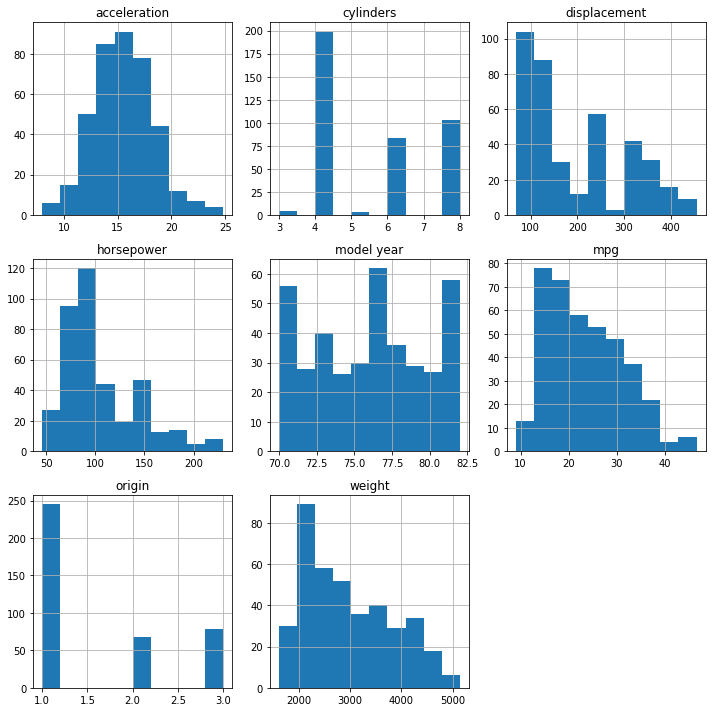

In [0]:
# Using histograms 
df.hist(figsize=(10,10))
plt.tight_layout()

In [0]:
df.describe().round(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,104.47,2977.58,15.54,75.98,1.58
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68,0.81
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.00,4.00,105.00,75.00,2225.25,13.78,73.00,1.00
50%,22.75,4.00,151.00,93.50,2803.50,15.50,76.00,1.00
75%,29.00,8.00,275.75,126.00,3614.75,17.02,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


## Transforming Categorical Variables

To use categorical variables for regression, they must be transformed.
There are 2 methods to dealing with them:
1. Label Encoding
    - Replace string categories with integer values (0 to n)
    - Can be done with:
        1. Pandas 
        2. Scikit Learn

2. One-hot / dummy encoding
    - Turn each category in a categorical variable into its own variable, that is either a 0 or 1. 0 for rows that do not belong to that sub-category. 1 for rows that belong to the sub-category
    - Can be done with:
        1. Pandas
        2. Scikit Learn


<class 'numpy.ndarray'>


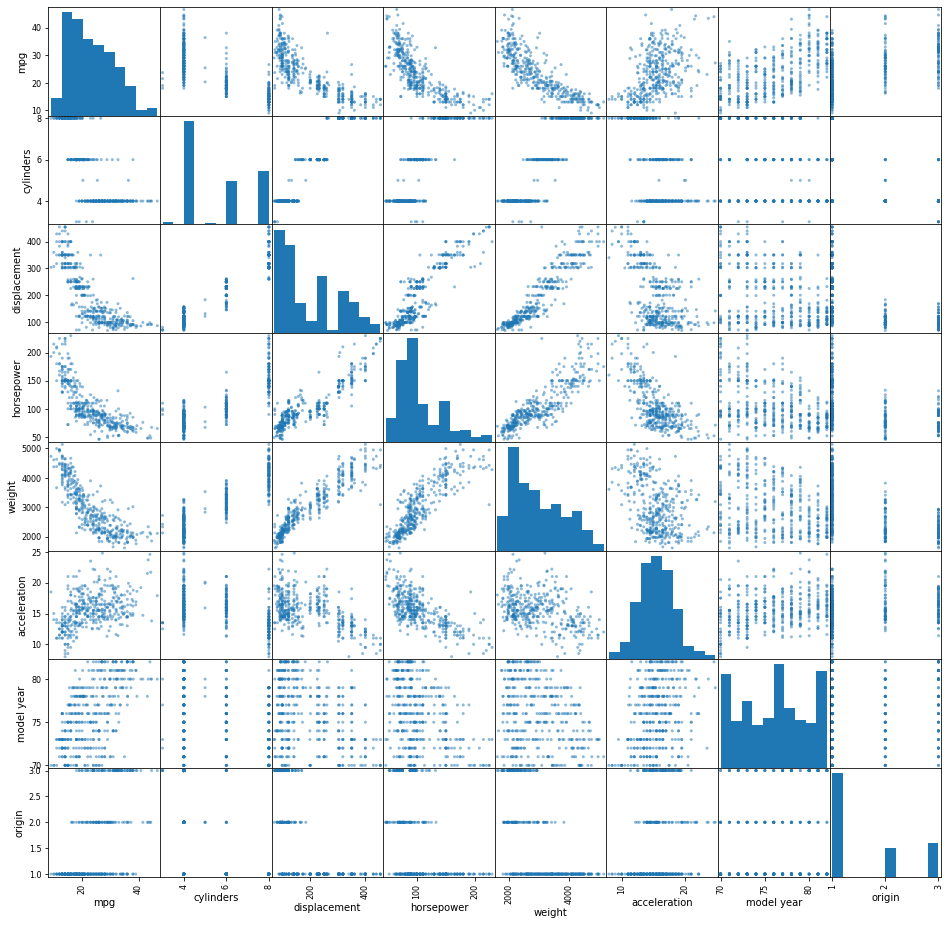

In [0]:
fig = pd.plotting.scatter_matrix(df,figsize=(16,16));
print(type(fig))

## Label Encoding

In [0]:
origin = ['USA', 'EU', 'EU', 'ASIA','USA', 'EU', 'EU', 'ASIA', 'ASIA', 'USA']
origin_series = pd.Series(origin)
origin_series

0     USA
1      EU
2      EU
3    ASIA
4     USA
5      EU
6      EU
7    ASIA
8    ASIA
9     USA
dtype: object

### Via pandas.cat.codes

In [0]:
origin_series

0     USA
1      EU
2      EU
3    ASIA
4     USA
5      EU
6      EU
7    ASIA
8    ASIA
9     USA
dtype: object

In [0]:
cat_origin = origin_series.astype('category')
cat_origin

0     USA
1      EU
2      EU
3    ASIA
4     USA
5      EU
6      EU
7    ASIA
8    ASIA
9     USA
dtype: category
Categories (3, object): [ASIA, EU, USA]

In [0]:
coded_origin = cat_origin.cat.codes
coded_origin

0    2
1    1
2    1
3    0
4    2
5    1
6    1
7    0
8    0
9    2
dtype: int8

In [0]:
## Label encoding via vat.codes
cat_origin = origin_series.astype('category')
coded_origin = cat_origin.cat.codes

## Compare value counts
display(cat_origin.value_counts())
display(coded_origin.value_counts())

EU      4
USA     3
ASIA    3
dtype: int64

1    4
2    3
0    3
dtype: int64

### Via Sklearn's LabelEncoder

In [0]:
## Using sklearn LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

code_origin_sk = encoder.fit_transform(cat_origin)
code_origin_sk

array([2, 1, 1, 0, 2, 1, 1, 0, 0, 2])

In [0]:
## Using sklearn LabelEncoder
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

coded_origin= lb_make.fit_transform(cat_origin)
pd.Series(coded_origin).value_counts()

1    4
2    3
0    3
dtype: int64

### Dummy Encoding

### Via Pandas.get_dummies()

In [0]:
origin_series

0     USA
1      EU
2      EU
3    ASIA
4     USA
5      EU
6      EU
7    ASIA
8    ASIA
9     USA
dtype: object

In [0]:
pd.get_dummies(cat_origin,drop_first=True)

,EU,USA
0,0,1
1,1,0
2,1,0
3,0,0
4,0,1
5,1,0
6,1,0
7,0,0
8,0,0
9,0,1


### Via Scikit-Learn's LabelBinerizer

In [0]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
origin_dummies = lb.fit_transform(cat_origin)
# You need to convert this back to a dataframe
origin_dum_df = pd.DataFrame(origin_dummies,columns=lb.classes_)
origin_dum_df

,ASIA,EU,USA
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1
5,0,1,0
6,0,1,0
7,1,0,0
8,1,0,0
9,0,0,1


### The Dummy Variable Trap


In [0]:
pd.get_dummies(cat_origin,drop_first=True)

,EU,USA
0,0,1
1,1,0
2,1,0
3,0,0
4,0,1
5,1,0
6,1,0
7,0,0
8,0,0
9,0,1


In [0]:
data=df.copy()
cyl_dummies = pd.get_dummies(data['cylinders'], prefix='cyl', drop_first=True)
yr_dummies = pd.get_dummies(data['model year'], prefix='yr', drop_first=True)
orig_dummies = pd.get_dummies(data['origin'], prefix='orig', drop_first=True)

data = data.drop(['cylinders','model year','origin'], axis=1)

data = pd.concat([data, cyl_dummies, yr_dummies, orig_dummies], axis=1)
data.head()

,mpg,displacement,horsepower,weight,acceleration,car name,cyl_4,cyl_5,cyl_6,cyl_8,yr_71,yr_72,yr_73,yr_74,yr_75,yr_76,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82,orig_2,orig_3
0,18.0,307.0,130,3504,12.0,chevrolet chevelle malibu,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,350.0,165,3693,11.5,buick skylark 320,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,318.0,150,3436,11.0,plymouth satellite,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16.0,304.0,150,3433,12.0,amc rebel sst,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,302.0,140,3449,10.5,ford torino,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Multicollinearity
- An additional concern to check for.


1. 

In [0]:
corr = df.corr().round(2)

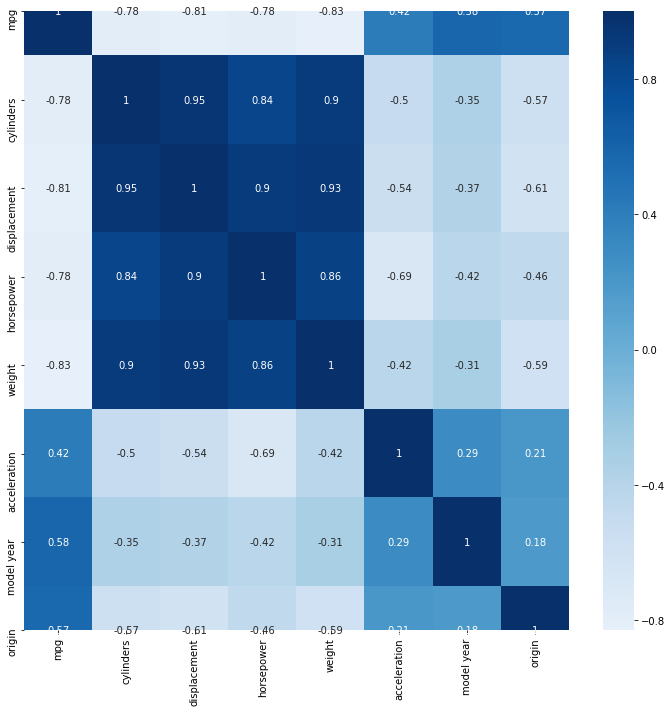

In [0]:
fig,ax=plt.subplots(ncols=1,figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='Blues',ax=ax,center=0)
# pd.plotting.table(ax[1],df.describe(),loc='upper right')
plt.tight_layout()

# 